In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.spatial.distance import pdist

In [8]:
heart_data = pd.read_csv('Heart.csv')


In [9]:
heart_data

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [10]:
heart_data = heart_data.select_dtypes(include=[np.number])

In [11]:
heart_data

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
0,1,63,1,145,233,1,2,150,0,2.3,3,0.0
1,2,67,1,160,286,0,2,108,1,1.5,2,3.0
2,3,67,1,120,229,0,2,129,1,2.6,2,2.0
3,4,37,1,130,250,0,0,187,0,3.5,3,0.0
4,5,41,0,130,204,0,2,172,0,1.4,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,110,264,0,0,132,0,1.2,2,0.0
299,300,68,1,144,193,1,0,141,0,3.4,2,2.0
300,301,57,1,130,131,0,0,115,1,1.2,2,1.0
301,302,57,0,130,236,0,2,174,0,0.0,2,1.0


In [13]:
heart_data = heart_data.fillna(heart_data.mean())

In [14]:
linkage_matrix = linkage(heart_data, method='ward', metric='euclidean')


In [15]:
linkage_matrix

array([[ 238.        ,  242.        ,    6.164414  ,    2.        ],
       [ 279.        ,  282.        ,    9.58957768,    2.        ],
       [   8.        ,   12.        ,    9.83056458,    2.        ],
       ...,
       [ 596.        ,  597.        ,  604.94804762,  127.        ],
       [ 599.        ,  602.        ,  831.49583632,  170.        ],
       [ 601.        ,  603.        , 1851.69955598,  303.        ]])

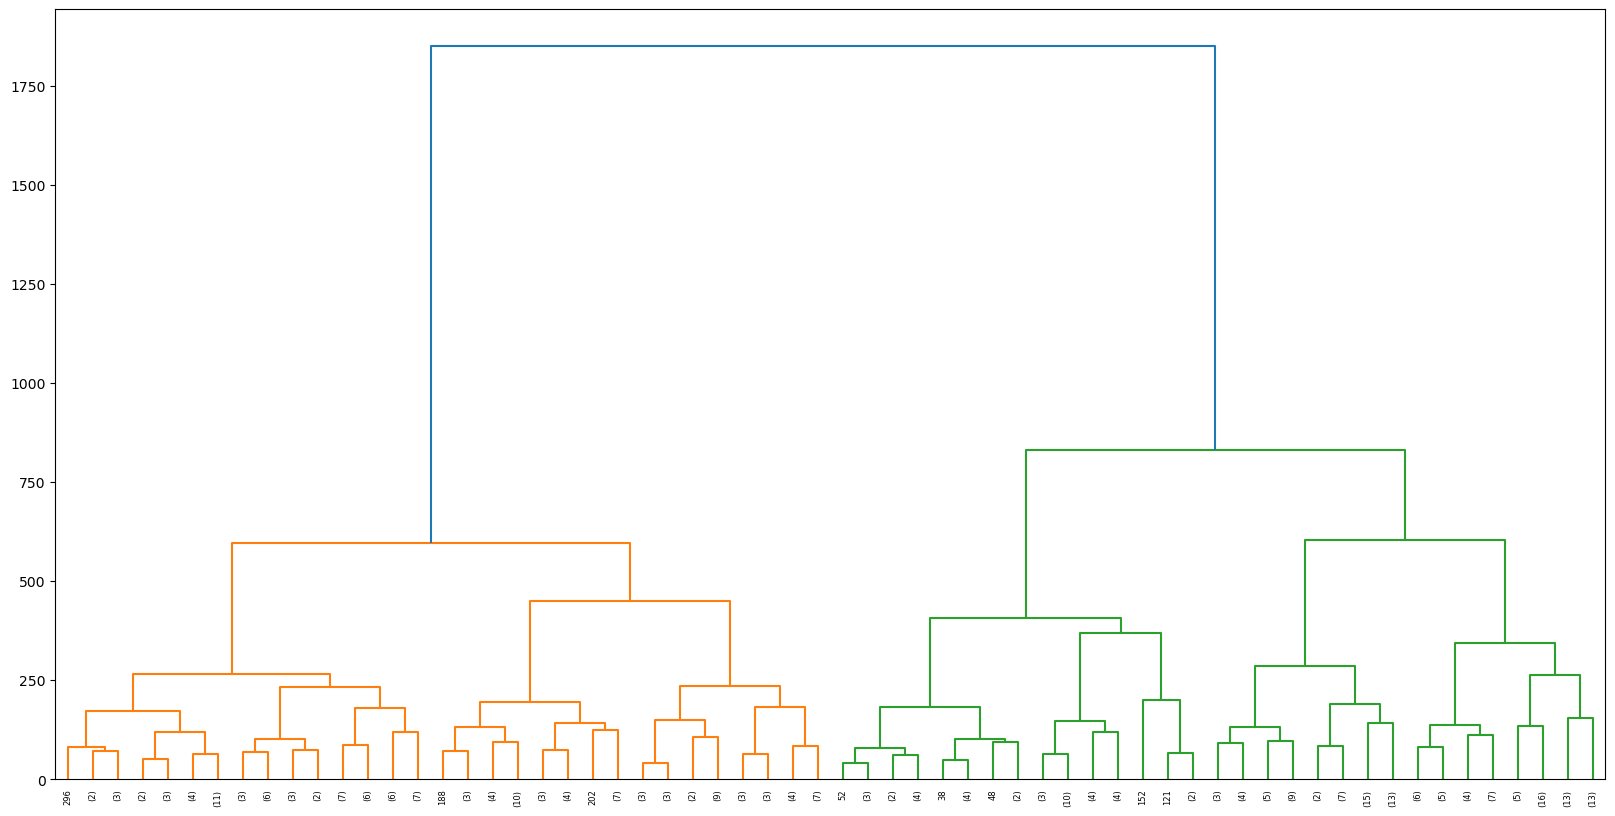

In [24]:
plt.figure(figsize=(20,10))
dendrogram(linkage_matrix, p=5,truncate_mode='level')
plt.show()

In [18]:
n_clusters = 3
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
agg_clustering.fit(heart_data)



AgglomerativeClustering(n_clusters=3)

In [19]:
# Get the cluster labels for each data point
cluster_labels = agg_clustering.labels_
print("Cluster Labels:", cluster_labels)

Cluster Labels: [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0
 0 2 0 0 0 0 0 2 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 2 0 0 0 0 0
 0 2 0 2 0 0 0 0 2 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 2
 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 2 0
 2 2 2 0 2 2 0 2 2 2 2 2 1 2 1 0 1 1 1 2 2 0 1 1 1 2 1 1 1 1 2 1 2 2 1 1 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1]
